In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

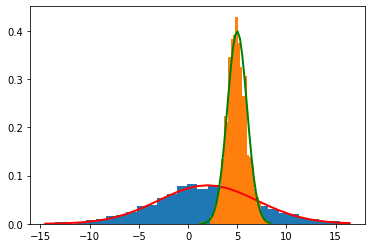

Probability A > B :  0.257183
Probability A < B :  0.742817
mu_a: 1.6642801247757706
mu_b: 4.958481679551553
sigma_a: 5.162756152135324
sigma_b: 1.0164628323894935
E(A-B): -3.2942015547757837


In [2]:
n_samples = 1000
mu_a = 2
mu_b = 5
sigma_a = 5
sigma_b = 1
#a = skewnorm.rvs(5, loc=mu_a, scale=sigma_a, size=n_samples).astype(np.int)
#b = skewnorm.rvs(-5, loc=mu_b, scale=sigma_b, size=n_samples).astype(np.int)

#a1 = np.zeros(200)
#a2 = np.ones(800)*5
#a= np.concatenate((a1, a2), axis=None)
#b=np.ones(1000)*4.5

a=np.random.normal(mu_a,sigma_a,n_samples)
b=np.random.normal(mu_b,sigma_b,n_samples)

count, bins, ignored = plt.hist(a, 30, density=True)
plt.plot(bins, 1/(sigma_a * np.sqrt(2 * np.pi)) *

            np.exp( - (bins - mu_a)**2 / (2 * sigma_a**2) ),

        linewidth=2, color='r')
count, bins, ignored = plt.hist(b, 30, density=True)
plt.plot(bins, 1/(sigma_b * np.sqrt(2 * np.pi)) *

            np.exp( - (bins - mu_b)**2 / (2 * sigma_b**2) ),

        linewidth=2, color='g')
plt.show()
a_final=np.tile(a,(n_samples,1))
b_final=np.transpose(np.tile(b,(n_samples,1)))
prob = np.sum(a_final>b_final)/(n_samples**2)
print("Probability A > B : ", prob)
prob = np.sum(a_final<b_final)/(n_samples**2)
print("Probability A < B : ", prob)
print("mu_a:",np.mean(a))
print("mu_b:",np.mean(b))
print("sigma_a:",np.std(a))
print("sigma_b:",np.std(b))
print("E(A-B):",np.mean(a_final-b_final))

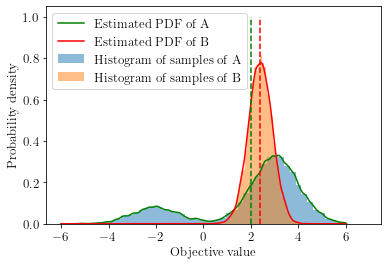

Probability A > B :  0.57290445
Probability A < B :  0.42709555
mu_a: 2.0185121421165544
mu_b: 2.3982390590828007
sigma_a: 2.24482387762881
sigma_b: 0.5020392944853657
E(A-B): -0.3797269169662457
E(A)-E(B): -0.3797269169662463


In [3]:
from sklearn.neighbors import KernelDensity
from matplotlib import rc
n_samples = 10000
mu_a = 1
mu_b = 4.5
sigma_a = 10
sigma_b = 0.1
rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 13})
#a = skewnorm.rvs(5, loc=mu_a, scale=sigma_a, size=n_samples).astype(np.int)
#b = skewnorm.rvs(-5, loc=mu_b, scale=sigma_b, size=n_samples).astype(np.int)

#a = np.concatenate((np.random.normal(0, 0.1, int(0.2 * n_samples)),
#                    np.random.normal(5, 0.1, int(0.8 * n_samples))))

#b=np.random.normal(mu_b,sigma_b,n_samples)

a = np.concatenate((np.random.normal(-2, 1, int(0.2 * n_samples)),
                    np.random.normal(3, 1, int(0.8 * n_samples))))

b=np.random.normal(2.4,0.5,n_samples)

#a1 = np.zeros(200)
#a2 = np.ones(800)*5
#a= np.concatenate((a1, a2), axis=None)
#b=np.ones(1000)*4.5
kde_a = KernelDensity(kernel='gaussian', bandwidth=1.06*np.std(b)/np.power(n_samples, (1/5))).fit(a.reshape(-1,1))
kde_b = KernelDensity(kernel='gaussian', bandwidth=1.06*np.std(b)/np.power(n_samples, (1/5))).fit(b.reshape(-1,1))
x=np.linspace(-6, 6.0, num=2000)
kde_y_a = np.exp(kde_a.score_samples(x.reshape(-1,1)))
kde_y_b = np.exp(kde_b.score_samples(x.reshape(-1,1)))

fig, ax = plt.subplots()
ax.set_xlabel(r'Objective value')
ax.set_ylabel(r'Probability density')
count, bins, ignored = ax.hist(a, 50, density=True, alpha=0.5, label=r'Histogram of samples of A')
count, bins, ignored = ax.hist(b, 50, density=True, alpha=0.5, label=r'Histogram of samples of B')
ax.plot(x,kde_y_a, label = r'Estimated PDF of A',color='g')
ax.plot(x,kde_y_b, label = r'Estimated PDF of B',color='r')
ex_a=np.mean(a)
ex_b=np.mean(b)
ax.plot([ex_a,ex_a],[0,1],color = 'g',  linestyle='dashed')
ax.plot([ex_b,ex_b],[0,1],color = 'r', linestyle='dashed')
#plt.plot(bins, 1/(sigma_a * np.sqrt(2 * np.pi)) *

#            np.exp( - (bins - mu_a)**2 / (2 * sigma_a**2) ),

        #linewidth=2, color='r')

#plt.plot(bins, 1/(sigma_b * np.sqrt(2 * np.pi)) *
#
#            np.exp( - (bins - mu_b)**2 / (2 * sigma_b**2) ),
#
#        linewidth=2, color='g')
ax.legend()
plt.show()
fig.tight_layout()
fig.savefig('Distribution_expectation_2.pdf')
a_final=np.tile(a,(n_samples,1))
b_final=np.transpose(np.tile(b,(n_samples,1)))
prob = np.sum(a_final>b_final)/(n_samples**2)
print("Probability A > B : ", prob)
prob = np.sum(a_final<b_final)/(n_samples**2)
print("Probability A < B : ", prob)
print("mu_a:",np.mean(a))
print("mu_b:",np.mean(b))
print("sigma_a:",np.std(a))
print("sigma_b:",np.std(b))
print("E(A-B):",np.mean(a_final-b_final))
print("E(A)-E(B):",np.mean(a)-np.mean(b))

In [5]:
print("EI(A):",np.mean(8-a_final))
print("EI(B):",np.mean(8-b_final))

EI(A): 5.981487857883483
EI(B): 5.601760940917178


In [4]:
import numpy as np
from scipy.stats import norm

z=np.array([1,2,3])
w=np.array([1,2,3])
mu_f=np.array([4,5,6])
sigma_f=np.array([0.2,0.3,0.4])


In [47]:
g=np.max(w*(mu_f-z))
m=w*(mu_f-z)
s=w*sigma_f
g_m_s = (g-m)/s
print(g)
print(m)
print(s)
pdf_i = norm.pdf(g_m_s)
cdf_i = norm.cdf(g_m_s)
print(pdf_i)
print(cdf_i)

9
[3 6 9]
[0.2 0.6 1.2]
[1.47364613e-196 1.48671951e-006 3.98942280e-001]
[1.         0.99999971 0.5       ]


In [7]:
def get_pdf_g(g, m, s):
    g_m_s = (g-m)/s
    pdf_i = norm.pdf(g_m_s)
    cdf_i = norm.cdf(g_m_s)
    prod_cdf_g = np.prod(cdf_i)
    sigma_term = np.sum((pdf_i/cdf_i)/s)
    pdf_g = sigma_term * prod_cdf_g
    return pdf_g

In [52]:
g1=np.linspace(0, 20.0, num=1000)
pdf_g1 = np.zeros(1000)
for i in range(1000):
    pdf_g1[i] = get_pdf_g(g1[i],m,s)

In [53]:
import sys
sys.path.insert(1, '/home/amrzr/Work/Codes/offline_data_driven_moea/')
from desdeo_emo.othertools.ProbabilityWrong import Probability_wrong

In [54]:
pwrong_current = Probability_wrong(mean_values=mu_f.reshape(1,-1), stddev_values=sigma_f.reshape(1,-1), n_samples=1000)
pwrong_current.vect_sample_f()
g_samples = np.max(np.tile(w.reshape(1,-1,1),(1,1,1000))*(pwrong_current.f_samples-np.tile(z.reshape(1,-1,1),(1,1,1000))), axis=1).flatten()

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'g value')
ax.set_ylabel(r'Probability density')
count, bins, ignored = ax.hist(g_samples, 50, density=True, alpha=0.5, label=r'Histogram of g')
ax.plot(g1,pdf_g1,color='g',label=r'PDF(g)')
ax.legend()
#fig.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (10000,) and (1000,)